Outlier Indices: [10, 12, 14, 25, 26, 28, 29, 30, 31, 35, 36, 39, 45, 51]


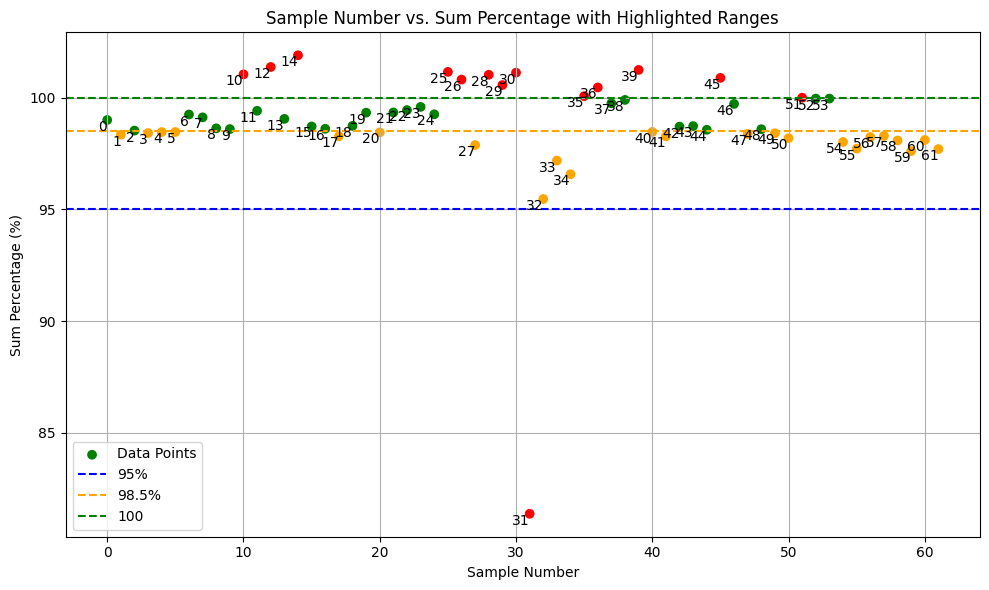

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.1 Analyses/EPMA RAW DATA/EPMA S.1 Oxide Data.csv'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()

# Sum up all columns for each sample
sum_percentages = data.sum(axis=1)

# Define the masks for different ranges
green_mask = (sum_percentages >= 98.5) & (sum_percentages <= 100)
orange_mask = (sum_percentages >= 95) & (sum_percentages < 98.5)
red_mask = (sum_percentages < 95) | (sum_percentages > 100)

# Create a color map
colors = ['green' if green else 'orange' if orange else 'red' for green, orange in zip(green_mask, orange_mask)]

# Extract indices of outliers and in-range data
outlier_indices = data[red_mask].index.tolist()
print("Outlier Indices:", outlier_indices)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data.index, sum_percentages, c=colors, label='Data Points')
plt.axhline(y=95, color='blue', linestyle='--', label='95%')
plt.axhline(y=98.5, color='orange', linestyle='--', label='98.5%')
plt.axhline(y=100, color='green', linestyle='--', label='100')
plt.title('Sample Number vs. Sum Percentage with Highlighted Ranges')
plt.xlabel('Sample Number')
plt.ylabel('Sum Percentage (%)')
plt.legend()
plt.grid(True)

for j in range(len(data.index)):
    plt.annotate(j, (data.index[j], sum_percentages[j]), fontsize=10, ha='right', va='top', color='black')

plt.tight_layout()
plt.show()
